### Working with GBIF data in presence point records

In [1]:
from iSDM.species import GBIFSpecies

In [2]:
my_species = GBIFSpecies(name_species="Etheostoma_blennioides")

In [3]:
my_species.name_species

'Etheostoma_blennioides'

#### just some logging/plotting magic to output in this notebook, nothing to care about.

In [4]:
%matplotlib inline
import logging
root = logging.getLogger()
root.addHandler(logging.StreamHandler())

## 1. Find and download all matching species data from GBIF. At this point no data cleaning is done yet.
#### Show only first 5 observation rows (head()). 

In [5]:
my_species.find_species_occurrences().head()

Loading species ... 
Number of occurrences: 7229 
True
Loaded species: ['Etheostoma blennioides'] 


,accessrights,associatedoccurrences,associatedreferences,associatedsequences,basisofrecord,bibliographiccitation,catalognumber,class,classkey,collectioncode,...,type,typestatus,verbatimcoordinatesystem,verbatimdepth,verbatimelevation,verbatimeventdate,verbatimlocality,vernacularname,waterbody,year
0,"Open Access, http://creativecommons.org/public...",NaN,NaN,NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 028684),YPM ICH 028684,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2016.0
1,"Open Access, http://creativecommons.org/public...",NaN,NaN,NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 028456),YPM ICH 028456,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2015.0
2,NaN,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,1937841,Actinopterygii,204,Observations,...,NaN,NaN,NaN,NaN,NaN,Thu Sep 10 2015 14:51:49 GMT-0400 (EDT),"3827–4235 Fobes Rd, Rock Creek, OH, US",NaN,NaN,2015.0
3,NaN,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,623289,Actinopterygii,204,Observations,...,NaN,NaN,NaN,NaN,NaN,2014-04-13,Beaver Creek,NaN,NaN,2014.0
4,"Open Access, http://creativecommons.org/public...",NaN,Det. by: Thomas J. Near,NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 026964),YPM ICH 026964,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2014.0


#### taxonkey derived from GBIF data. It's a sort of unique ID per species

In [6]:
my_species.ID # taxonkey derived from GBIF. It's a sort of unique ID per species

2382397

### Data is serialized and saved in a file. 
Default location: current working directory. Default filename: GBIFID of the species

In [7]:
my_species.save_data()

Saved data: /home/daniela/git/iSDM/notebooks/Etheostoma_blennioides2382397.pkl 
Type of data: <class 'pandas.core.frame.DataFrame'> 


In [8]:
my_species.source.name

'GBIF'

### Let's get a general idea of where the species is distributed on the map

Data geometrized: converted into GeoPandas dataframe.
Points with NaN coordinnates ignored. 


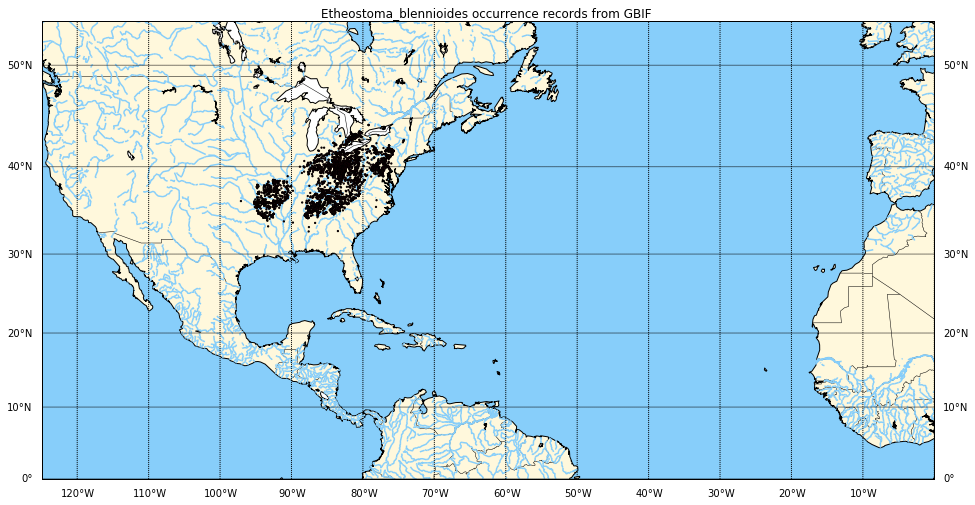

In [9]:
my_species.plot_species_occurrence()

In [10]:
polygonized_species = my_species.polygonize()

Data polygonized without envelope.
Cascaded union of polygons created.


In [11]:
my_species.overlay(polygonized_species.geometry)
my_species.data_full.shape

Overlayed species occurrence data with the given range map.


(5232, 138)

In [12]:
polygonized_species.geometry = polygonized_species.geometry[7:]

In [13]:
polygonized_species.dropna()

,geometry
7,"POLYGON ((-92.26972000000001 33.30278, -92.562..."


In [14]:
polygonized_species.dropna(inplace=True)

In [15]:
my_species.overlay(polygonized_species.geometry)
my_species.data_full.shape

Overlayed species occurrence data with the given range map.


(5218, 138)

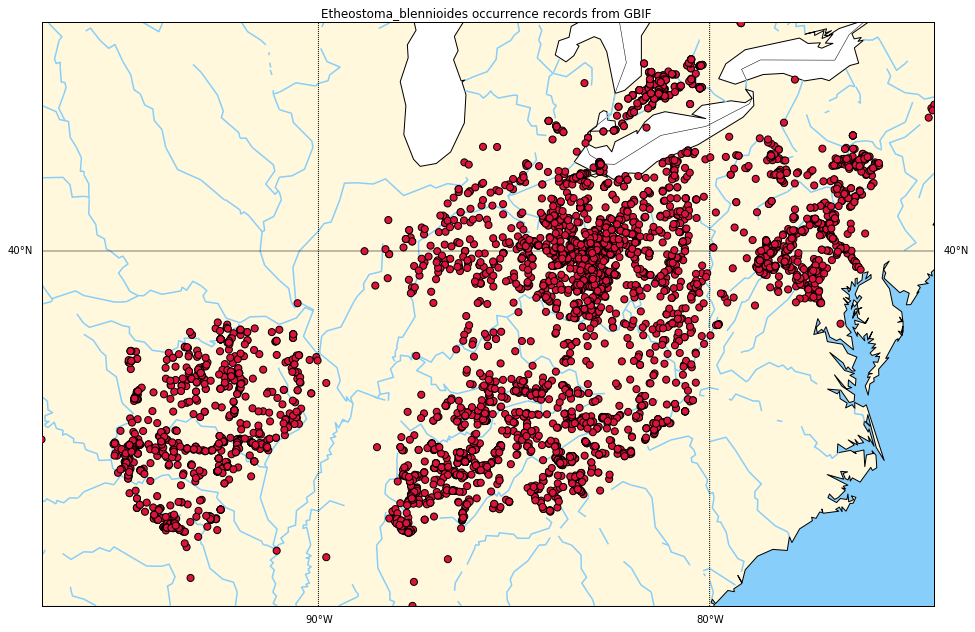

In [16]:
my_species.plot_species_occurrence()

#### The map is always zoomed to the species borders. Notice low right corner also has one point.

### 2. Or just load existing data into a Species object. Let's use the file we saved before.

In [17]:
data = my_species.load_data("./Etheostoma_blennioides2382397.pkl") # or just load existing data into Species object

Loading data from: ./Etheostoma_blennioides2382397.pkl
Succesfully loaded previously saved data.


In [18]:
data.columns # all the columns available per observation

Index(['accessrights', 'associatedoccurrences', 'associatedreferences',
       'associatedsequences', 'basisofrecord', 'bibliographiccitation',
       'catalognumber', 'class', 'classkey', 'collectioncode',
       ...
       'type', 'typestatus', 'verbatimcoordinatesystem', 'verbatimdepth',
       'verbatimelevation', 'verbatimeventdate', 'verbatimlocality',
       'vernacularname', 'waterbody', 'year'],
      dtype='object', length=137)

In [19]:
data.head()

,accessrights,associatedoccurrences,associatedreferences,associatedsequences,basisofrecord,bibliographiccitation,catalognumber,class,classkey,collectioncode,...,type,typestatus,verbatimcoordinatesystem,verbatimdepth,verbatimelevation,verbatimeventdate,verbatimlocality,vernacularname,waterbody,year
0,"Open Access, http://creativecommons.org/public...",NaN,NaN,NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 028684),YPM ICH 028684,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2016.0
1,"Open Access, http://creativecommons.org/public...",NaN,NaN,NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 028456),YPM ICH 028456,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2015.0
2,NaN,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,1937841,Actinopterygii,204,Observations,...,NaN,NaN,NaN,NaN,NaN,Thu Sep 10 2015 14:51:49 GMT-0400 (EDT),"3827–4235 Fobes Rd, Rock Creek, OH, US",NaN,NaN,2015.0
3,NaN,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,623289,Actinopterygii,204,Observations,...,NaN,NaN,NaN,NaN,NaN,2014-04-13,Beaver Creek,NaN,NaN,2014.0
4,"Open Access, http://creativecommons.org/public...",NaN,Det. by: Thomas J. Near,NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 026964),YPM ICH 026964,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2014.0


## 3. Examples of simple (meta-)data exploration

#### Show all unique values of the 'country' column

In [20]:
data['country'].unique().tolist()

['United States', nan, 'Canada', 'India']

In [21]:
data.shape # there are 7226 observations, 138 parameters per observation

(7229, 137)

In [22]:
data['vernacularname'].unique().tolist() # self-explanatory

['perches; perch-like fishes; ray-finned fishes; vertebrates; chordates; animals',
 nan,
 'Greenside Darter',
 'GREENSIDE DARTER',
 'greenside darter']

### How about latitude/longitude? Does the data need cleaning?
head() or tail() is only used to limit the tabular output in this notebook. The "data" structure contains it all.

In [23]:
data['decimallatitude'].tail(10)

7219    39.81718
7220         NaN
7221         NaN
7222    37.05000
7223    41.84000
7224    35.89813
7225    43.38421
7226         NaN
7227         NaN
7228         NaN
Name: decimallatitude, dtype: float64

### Hmm, so some values are 'NaN', which means not available.  
We can fill them with something (default?), or drop those records where latitude/longitude are not available. Let's drop records where the latitude/longitude data is not available

In [24]:
import numpy as np
data_cleaned = data.dropna(subset = ['decimallatitude', 'decimallongitude']) # drop records where data not available

In [25]:
data_cleaned.shape # less occurrence records now: 5226

(5232, 137)

In [26]:
data_cleaned['basisofrecord'].unique()

array(['PRESERVED_SPECIMEN', 'HUMAN_OBSERVATION', 'UNKNOWN'], dtype=object)

In [27]:
# this many records with no decimalLatitude and decimalLongitude
import numpy as np
data[data['decimallatitude'].isnull() & data['decimallongitude'].isnull()].size

273589

#### How many of those have no 'locality' or 'verbatimLocality'? : 26 apparently.

In [28]:
data[data['decimallatitude'].isnull() & 
     data['decimallongitude'].isnull() & 
     data['locality'].isnull() & 
     data['verbatimlocality'].isnull()]

,accessrights,associatedoccurrences,associatedreferences,associatedsequences,basisofrecord,bibliographiccitation,catalognumber,class,classkey,collectioncode,...,type,typestatus,verbatimcoordinatesystem,verbatimdepth,verbatimelevation,verbatimeventdate,verbatimlocality,vernacularname,waterbody,year
1269,http://fieldmuseum.org/about/copyright-informa...,NaN,NaN,NaN,PRESERVED_SPECIMEN,NaN,112647,Actinopterygii,204,Fishes,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0
4391,NaN,NaN,NaN,NaN,UNKNOWN,NaN,56-5116,Actinopterygii,204,ON-CDC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972.0
4756,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17588,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1968.0
5224,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17585,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5231,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17580,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5237,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17578,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5253,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17583,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5254,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17598,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5258,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17592,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5286,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17582,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0


In [29]:
data_cleaned[['dateidentified', 'day', 'month', 'year']].head()

,dateidentified,day,month,year
1,NaN,23.0,5.0,2015.0
2,2015-09-11T23:37:54.000+0000,10.0,9.0,2015.0
3,2014-04-14T00:24:18.000+0000,13.0,4.0,2014.0
4,NaN,13.0,5.0,2014.0
5,NaN,14.0,5.0,2014.0


Seems like not all records have a 'dateidentified', but 'day','month', 'year' fields are there for many (all?) records. TODO: what about verbatimdate

### Select only observation records newer than 2010; 
Say that only latitude, longitude, rightsHolder, datasetName columns are interesting for our selection.

In [30]:
data_selected = data_cleaned[data_cleaned['year']>2010][['decimallatitude','decimallongitude', 'rightsholder', 'datasetname']]

#### more filtering: select only those with a non-null datasetName

In [31]:
data_selected[~data_selected.datasetname.isnull()].head(10)

,decimallatitude,decimallongitude,rightsholder,datasetname
2,41.79664,-80.97289,Robert L Curtis,iNaturalist research-grade observations
3,37.97240,-83.56716,Brian Wulker,iNaturalist research-grade observations
11,35.17770,-83.88780,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
14,35.07780,-83.97430,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
18,35.16030,-83.92020,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
30,36.41300,-81.40710,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
48,36.40790,-81.40160,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
52,36.54960,-81.00230,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
53,36.55790,-81.21670,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
55,36.06540,-91.61040,NaN,Auburn University Museum Fish Collection


### If you hare happy with this filtering, and you want to save the species data:

In [32]:
my_species.set_data(data_selected) # update the object "my_species" to contain the filtered data

In [33]:
my_species.save_data(file_name="updated_dataset.pkl")

Saved data: /home/daniela/git/iSDM/notebooks/updated_dataset.pkl 
Type of data: <class 'pandas.core.frame.DataFrame'> 


### Plot our filtered selection 

Data geometrized: converted into GeoPandas dataframe.
Points with NaN coordinnates ignored. 


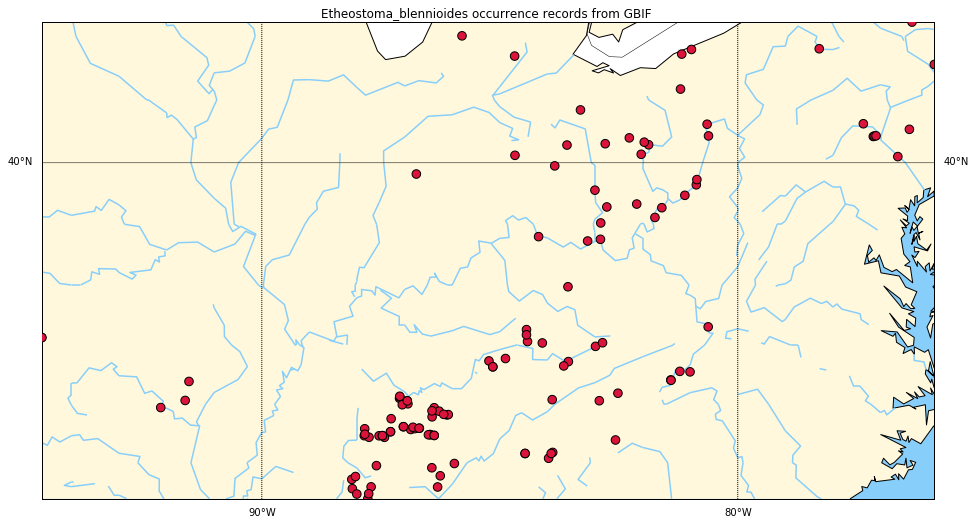

In [34]:
my_species.plot_species_occurrence()

In [35]:
my_species.get_data().shape # there are 119 records now

(119, 5)

### 4. Load data from downloaded csv file (from GBIF website, not API; differs a bit)

In [36]:
csv_data = my_species.load_csv('../data/GBIF.csv') 

Loading data from: ../data/GBIF.csv
Succesfully loaded previously saved CSV data.
Updated species ID: 2382397 


In [37]:
csv_data.head() # let's peak into the data

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,...,recordnumber,identifiedby,rights,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue
0,1224542608,71e6db8e-f762-11e1-a439-00145eb45e9a,urn:catalog:OMNH:FISH:85718,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,Dr. Aaron Geheber,NaN,Sam Noble Oklahoma Museum of Natural History,Aaron Geheber,NaN,NaN,2015-12-23T21:01Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
1,17598896,83a8c0da-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,"Baldwin, M.E.",NaN,NaN,"Baldwin, M.E.; Bowlby, J.N.",NaN,NaN,2014-06-04T23:44Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
2,17598905,83a8c0da-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,"Baldwin, Mary Elizabeth",NaN,NaN,"Baldwin, Mary Elizabeth; Casbourn, Hugh R.",NaN,NaN,2014-06-04T23:44Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
3,198193430,961f602a-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,NaN,NaN,NaN,"R.D. Suttkus, Eaton & Donahue",NaN,NaN,2014-06-05T03:09Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
4,198193618,961f602a-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,NaN,NaN,NaN,"R.D. Suttkus, J.S. Ramsey & M.D. Dahlberg",NaN,NaN,2014-06-05T03:09Z,NaN,TAXON_MATCH_HIGHERRANK;GEODETIC_DATUM_ASSUMED_...


In [38]:
csv_data['specieskey'].unique()

array([2382397])

In [39]:
my_species.save_data() # by default this 'speciesKey' is used. Alternative name can be provided

Saved data: /home/daniela/git/iSDM/notebooks/Etheostoma_blennioides2382397.pkl 
Type of data: <class 'pandas.core.frame.DataFrame'> 


In [40]:
csv_data.columns.size # csv data for some reason a lot less columns

42

In [41]:
data.columns.size # data from using GBIF API directly

137

#### Which columns are in 'data', but not in 'csv_data'?

In [42]:
list(set(data.columns.tolist()) - set(csv_data.columns.tolist())) # hmm, 'decimalLatitude' vs 'decimallatitude'

['references',
 'country',
 'identificationverificationstatus',
 'islandgroup',
 'identifier',
 'genuskey',
 'higherclassification',
 'media',
 'enddayofyear',
 'relations',
 'stateprovince',
 'fieldnotes',
 'individualcount',
 'license',
 'datasetid',
 'verbatimdepth',
 'island',
 'eventremarks',
 'lastparsed',
 'accessrights',
 'locationremarks',
 'familykey',
 'geodeticdatum',
 'samplingprotocol',
 'genericname',
 'language',
 'identificationremarks',
 'lastcrawled',
 'issues',
 'associatedoccurrences',
 'protocol',
 'ownerinstitutioncode',
 'eventid',
 'waterbody',
 'georeferencesources',
 'associatedreferences',
 'locationid',
 'continent',
 'dynamicproperties',
 'habitat',
 'highergeography',
 'collectionid',
 'locationaccordingto',
 'datasetname',
 'startdayofyear',
 'organismid',
 'disposition',
 'footprintwkt',
 'phylumkey',
 'taxonid',
 'kingdomkey',
 'informationwithheld',
 'lifestage',
 'previousidentifications',
 'georeferenceprotocol',
 'coordinateprecision',
 'http://unk

#### Which columns are in 'csv_data' but not in 'data'?

In [43]:
list(set(csv_data.columns.tolist()) - set(data.columns.tolist())) # hmm, not many

['mediatype', 'infraspecificepithet', 'issue']

### 5. Geometrizing the GBIF presence-only point records.

One way of converting point-records (lat/lon) to geometric shapes is by expanding each sample point into a buffer (or "polygon of influence"), and simplifying + merging the overlapping buffers into a cascaded union. 

In [44]:
geometrized_species =  my_species.polygonize()  # returns a geopandas dataframe with a geometry column.

Data geometrized: converted into GeoPandas dataframe.
Points with NaN coordinnates ignored. 
Data polygonized without envelope.
Cascaded union of polygons created.


In [45]:
geometrized_species

,geometry
0,"POLYGON ((-82.50020000000001 32.7504, -82.7930..."
1,"POLYGON ((-77.16722 35.54528, -77.460113218813..."
2,"POLYGON ((-124 44.65, -124.2928932188134 43.94..."
3,POLYGON ((-85.23066999999999 44.35975999999999...
4,"POLYGON ((-81.2 45.858, -81.49289321881345 45...."
5,"POLYGON ((-92.26971999999999 33.30278, -92.562..."


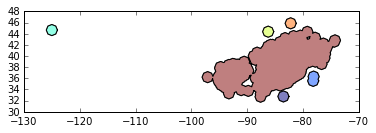

In [46]:
geometrized_species.plot()  # each isolated polygon is a separate record (do we want that or?)

Data polygonized without envelope.
Cascaded union of polygons created.


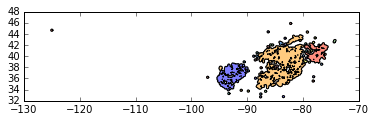

In [47]:
# we can tweak the parameters for the polygonize function
geometrized_species = my_species.polygonize(buffer_distance=0.2, simplify_tolerance=0.02)
geometrized_species.plot()

In [48]:
my_species.get_data().shape

(5215, 43)

Data polygonized with envelope.
Cascaded union of polygons created.


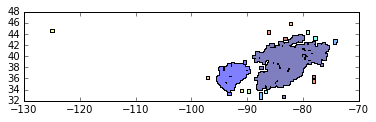

In [49]:
# with_envelope means "pixelized" (envelope around each buffer region)
geometrized_species = my_species.polygonize(buffer_distance=0.3, simplify_tolerance=0.03, with_envelope=True)
geometrized_species.plot()

### 6. Cut the outliers, i.e., overlay with a polygon

Define a "zoom-in" polygon that we use for selecting a subset of the data.

In [50]:
from shapely.geometry import Point, Polygon

In [51]:
# say we want to crop to this polygon area only
overlay_polygon = Polygon(((-100,30), (-100, 50), (-70, 50),(-70, 30)))

In [52]:
# Beware, this overwrites the original my_species data ("data_full" field)
my_species.data_full = my_species.data_full[my_species.data_full.geometry.within(overlay_polygon)]

Data polygonized without envelope.
Cascaded union of polygons created.


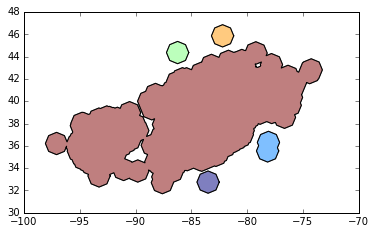

In [53]:
my_species.polygonize().plot()

Data polygonized without envelope.
Cascaded union of polygons created.


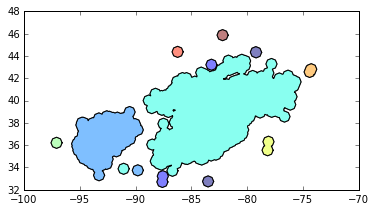

In [54]:
my_species.polygonize(buffer_distance=0.5, simplify_tolerance=0.05).plot() # more fine-grained

Data polygonized without envelope.
Cascaded union of polygons created.


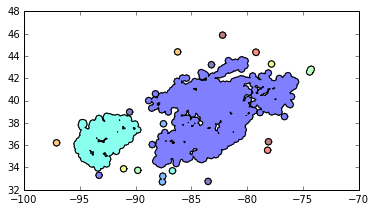

In [58]:
my_species.polygonize(buffer_distance=0.3, simplify_tolerance=0.03).plot()  # etc

Data polygonized with envelope.
Cascaded union of polygons created.


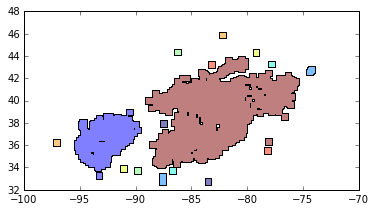

In [59]:
my_species.polygonize(buffer_distance=0.3, simplify_tolerance=0.03, with_envelope=True).plot() # with_envelope means pixelized

Data polygonized without envelope.
Cascaded union of polygons created.


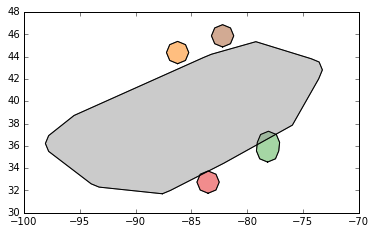

In [60]:
# we can further simplify with a "convex hull" around each polygon
my_species.polygonize().geometry.convex_hull.plot()

In [61]:
polygonized_species = my_species.polygonize()

Data polygonized without envelope.
Cascaded union of polygons created.


In [62]:
polygonized_species

,geometry
0,"POLYGON ((-82.50020000000001 32.7504, -82.7930..."
1,"POLYGON ((-77.16722 35.54528, -77.460113218813..."
2,POLYGON ((-85.23066999999999 44.35975999999999...
3,"POLYGON ((-81.2 45.858, -81.49289321881345 45...."
4,"POLYGON ((-92.26971999999999 33.30278, -92.562..."


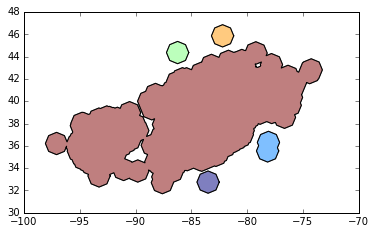

In [63]:
polygonized_species.plot()

### 6. Low-level manipulations

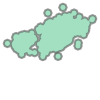

In [64]:
# We can make a union of all polygons into one "multipolygon" (Do we need this? I can make a wrapper if needed)
import shapely.ops
my_multipolygon = shapely.ops.cascaded_union(polygonized_species.geometry.tolist())
my_multipolygon

In [65]:
from geopandas import GeoDataFrame, GeoSeries
new_series = GeoSeries(shapely.ops.cascaded_union(polygonized_species.geometry.tolist()))
new_series

0    (POLYGON ((-77.16722 35.54528, -77.46011321881...
dtype: object

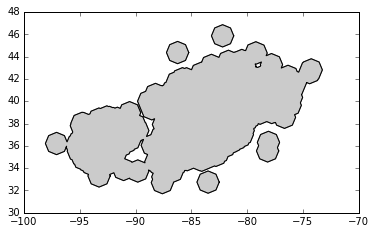

In [66]:
new_series.plot()

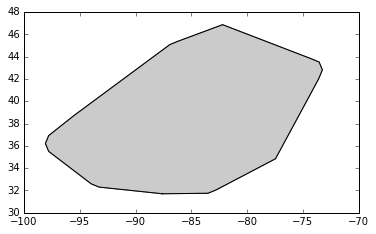

In [67]:
new_series.convex_hull.plot()

In [68]:
my_species.data_full.geometry.total_bounds

(-97.0792, 32.704440000000005, -74.257649999999998, 45.858000000000004)

In [69]:
my_species.data_full.geometry.bounds.minx.min()

-97.0792

In [70]:
my_species.data_full.geometry.bounds.miny.min()

32.704440000000005

In [71]:
my_species.data_full.geometry.bounds.maxx.max()

-74.257649999999998

In [72]:
my_species.data_full.geometry.bounds.maxy.max()

45.858000000000004